# IMPORTING THE REQUIRED LIBRARIES

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTING THE DATASET

In [3]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [16]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
#checking the data distribution in class column
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [24]:
#seperating the data for analysis 
#  0 ----> normal transaction
#  1 ----> fraudlent
normal = df[df.Class == 0]
fraudlent = df[df.Class == 1]
print(normal.shape)
print(fraudlent.shape)

(284315, 31)
(492, 31)


# statistical measures of the seperated data 

In [26]:
#for normal transactions
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [27]:
#for fraudlent transactions
fraudlent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [31]:
#comparing the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# undersampling 

In [41]:
#creating a dataframe for normal transactions with length of 492 for better prediction
normal_sample = normal.sample(n=492)
normal_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154923,103661.0,2.100356,0.310701,-2.559006,0.443879,1.247730,-1.197999,1.044050,-0.735614,1.192032,...,0.151719,0.845709,-0.256884,0.523467,0.888591,0.058945,-0.108642,-0.078825,41.40,0
40111,40098.0,-1.365835,2.364789,-0.478664,0.550427,-0.011238,-1.269523,0.904230,-0.160360,0.877913,...,-0.075736,0.415116,0.102707,0.358687,-0.369004,-0.382440,1.169578,0.654194,0.99,0
25235,33535.0,1.471877,-0.431763,-0.128771,-1.056410,-0.107491,0.195197,-0.531434,-0.043022,-0.862437,...,-0.102518,-0.324276,-0.062283,-1.309044,0.454712,-0.305328,0.025082,0.003738,7.95,0
90679,63119.0,-0.356911,0.628088,1.346091,0.504584,0.294353,0.790898,0.491769,0.174472,-0.637209,...,0.095756,0.166573,-0.006250,-1.041487,-0.407207,-0.457108,0.180874,0.165546,86.57,0
250335,154851.0,-1.515208,1.020959,-3.399971,-0.315616,-0.023125,-0.865767,1.421556,0.696674,-1.129424,...,0.581604,1.711426,0.357588,0.814471,-1.092846,0.335394,0.125454,-0.144593,182.88,0


In [42]:
#concatinating the two dataframes
new_df = pd.concat([normal_sample,fraudlent],axis=0)
new_df.shape

(984, 31)

In [43]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98779.278455,-0.070602,0.030771,-0.086492,-0.132254,-0.036813,0.039464,0.024883,-0.161365,0.005295,...,0.034881,0.009353,0.038637,0.027176,-0.03301,-0.002921,0.008015,-0.029960,0.033176,99.136199
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


# splitting the data into dependent and independent features

In [45]:
x = new_df.drop(columns='Class',axis=1)
y = new_df['Class']

In [46]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
154923  103661.0  2.100356  0.310701 -2.559006  0.443879  1.247730 -1.197999   
40111    40098.0 -1.365835  2.364789 -0.478664  0.550427 -0.011238 -1.269523   
25235    33535.0  1.471877 -0.431763 -0.128771 -1.056410 -0.107491  0.195197   
90679    63119.0 -0.356911  0.628088  1.346091  0.504584  0.294353  0.790898   
250335  154851.0 -1.515208  1.020959 -3.399971 -0.315616 -0.023125 -0.865767   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [48]:
print(y)

154923    0
40111     0
25235     0
90679     0
250335    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# splitting the data into training and testing

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

# Model Training

In [52]:
logistic = LogisticRegression()

In [53]:
#training the model with train data
logistic.fit(x_train,y_train)

LogisticRegression()

# Evaluation of the model

In [59]:
#accuracy score for the training data
x_train_prediction = logistic.predict(x_train)
train_data_accur = accuracy_score(x_train_prediction,y_train)
print('Training data accuracy : ',train_data_accur * 100)

Training data accuracy :  94.0279542566709


In [62]:
#accuracy score for the test data
x_test_prediction = logistic.predict(x_test)
test_data_accur = accuracy_score(x_test_prediction , y_test)
print('Test data accuracy : ',test_data_accur * 100)

Test data accuracy :  93.4010152284264


In [66]:
print(classification_report(x_test_prediction , y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       102
           1       0.90      0.97      0.93        95

    accuracy                           0.93       197
   macro avg       0.94      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



In [76]:
cm=confusion_matrix(x_test_prediction , y_test)
print(cm)

[[92 10]
 [ 3 92]]


Text(50.722222222222214, 0.5, 'Actual')

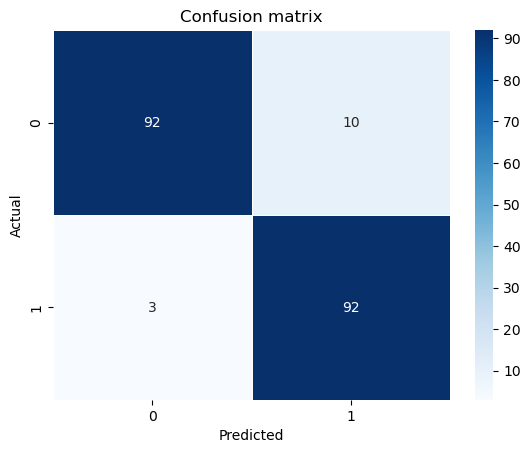

In [84]:
sns.heatmap(cm, annot=True, cmap="Blues", linewidths=.5)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')